# Описание

В этой работе будет проведен парсинг данных с сайта https://knigli.ru/ и создание программы, выдающей полезный вывод из книги случайным образом. Предусмотрена возможность выбора категорий книг, из которых будет получен вывод. Представленная программа и может быть полезна абсолютно всем.

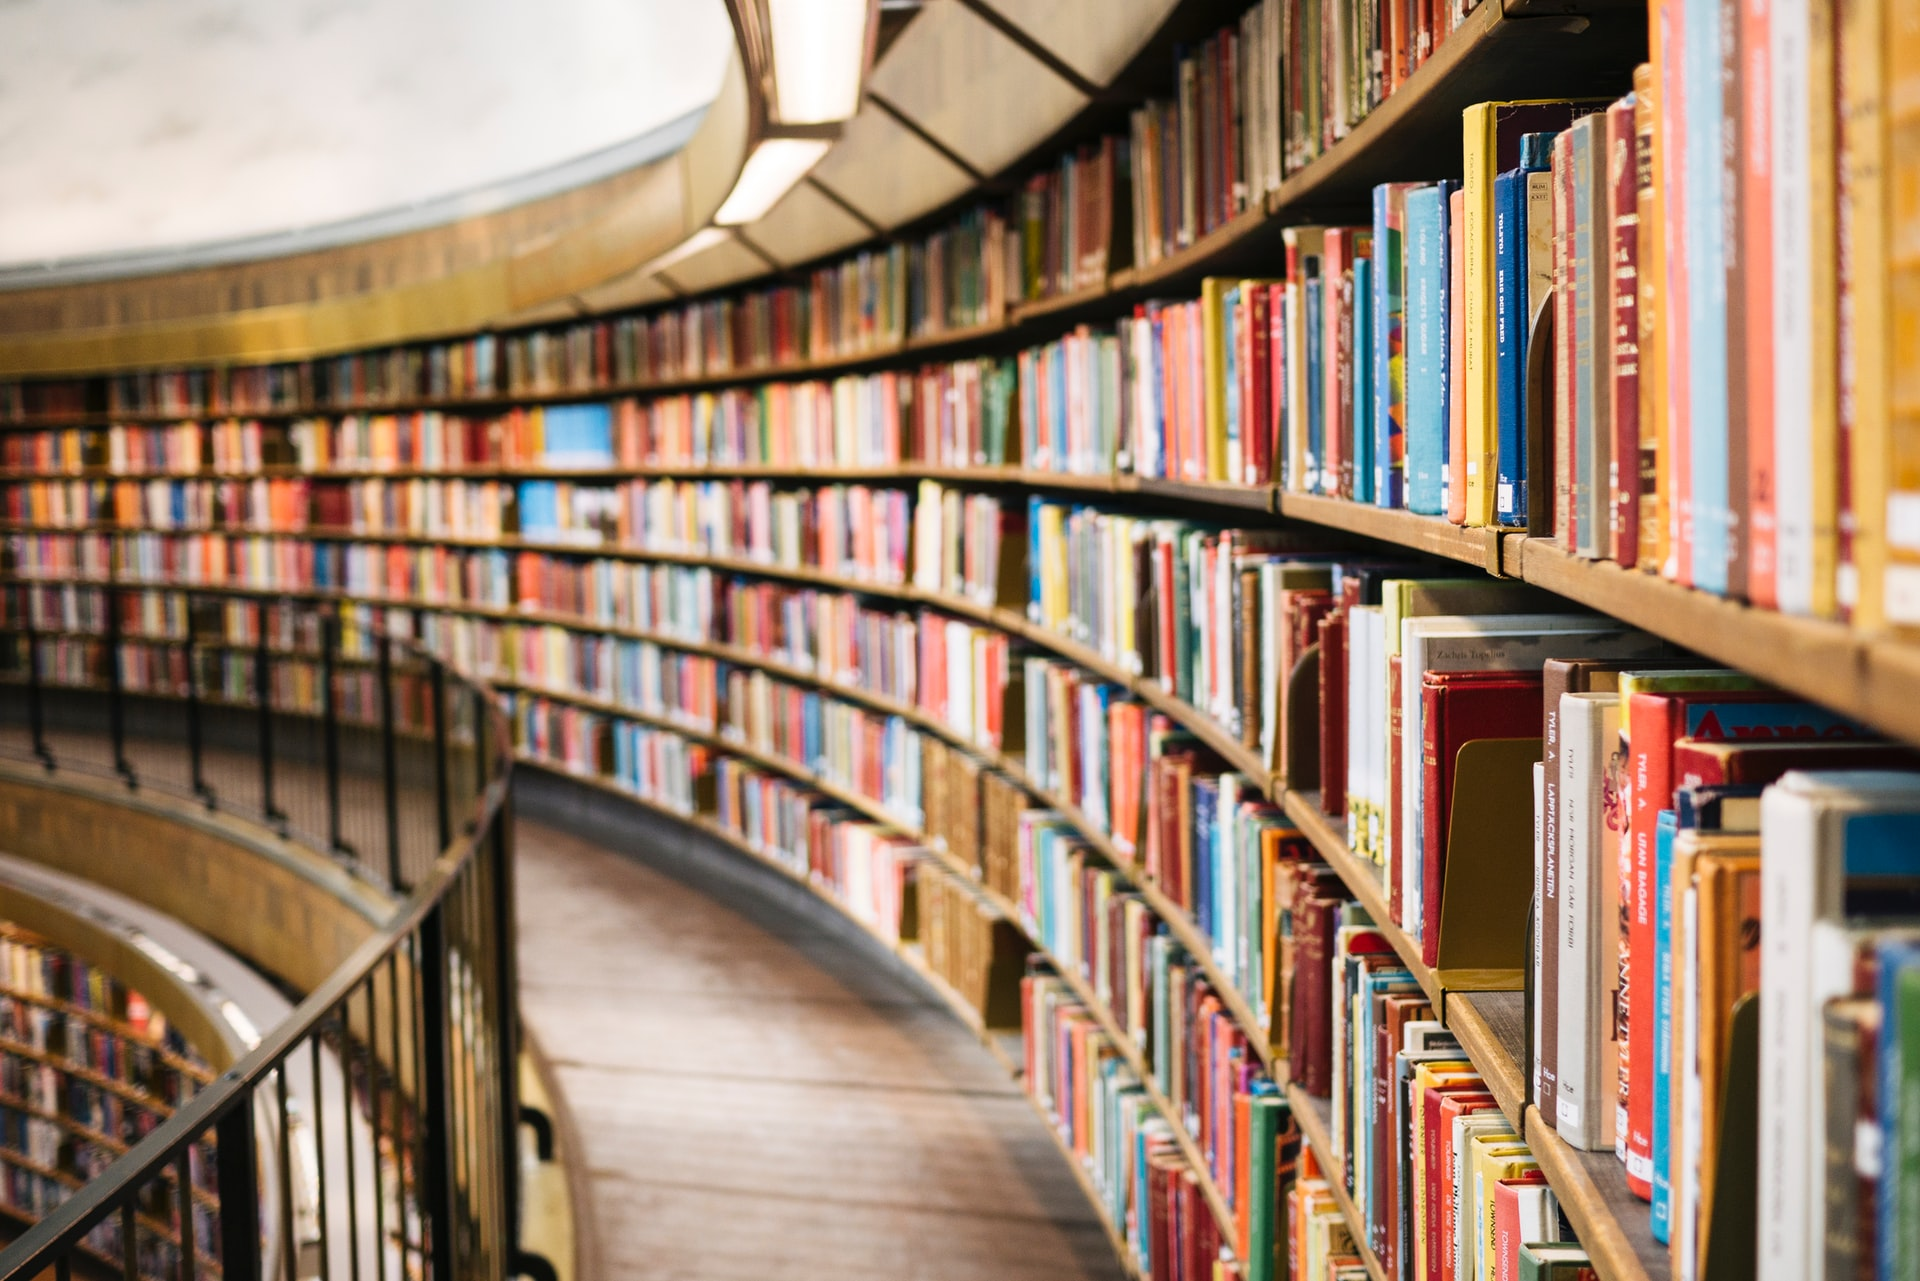

# Импорт библиотек

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import json
import re
import time
import warnings
import datetime as dt
from lxml import html
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import random

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Объявление основных переменных и функций

In [14]:
options = webdriver.ChromeOptions()
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36')

# Получение выводов

self_development = 'https://knigli.ru/samorazvitie/'
psychology = 'https://knigli.ru/psihologiya/'
marketing = 'https://knigli.ru/marketing-i-prodazhi/'
conversation = 'https://knigli.ru/peregovory/'
successful_stories = 'https://knigli.ru/istorii-uspeha/'

all_categories = [self_development, psychology, marketing, conversation, successful_stories]

## Получение ссылок на выводы из книг

In [15]:
def get_links(category):
    # Запуск браузера
    driver = webdriver.Chrome(executable_path='chromedriver.exe', options=options)
    driver.get(category)

    # Всего страниц
    pages = max([int(num.text) for num in driver.find_elements_by_xpath('//a[@class="page-numbers"]')]) 
    # Ссылки на выводы из книг для каждой книги
    links = []
    for page in range(1, pages+1):
        driver.get(category + f'page/{page}')
        time.sleep(3)
        links += [i.get_attribute('href') for i in driver.find_elements_by_class_name('post-title')] 
    driver.close()
    return links

In [18]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [16]:
%%time
all_links = []
for i in all_categories:
    all_links.append(get_links(i))

Wall time: 35.6 s


In [4]:
all_links = flatten(all_links)

In [5]:
with open("Conclusions_links.txt", "w") as f:
    f.write("\n".join(all_links))

In [6]:
with open('Conclusions_links.txt') as f:
    all_links = f.readlines()
    all_links = [x.strip() for x in all_links] 

In [7]:
len(all_links)

158

## Парсинг выводов из книг с сайта 

In [8]:
# Получить выводы из книги
def write_conclusions_to_json(book_link):
        conclusions_dicts = []
        book_name = driver.find_element_by_tag_name('h1').text.partition('«')[2][:-1]
        book_category = driver.find_element_by_class_name('post-categories-container').text
        conclusions = [i.text for i in driver.find_elements_by_class_name('vc_column-inner') if i.text and i.text[0].isdigit()]
        
        for i in range(len(conclusions)):
            conclusions_dict = {}
            conclusions_dict['book'] = book_name
            conclusions_dict['category'] = book_category
            conclusions_dict['conclusion'] = conclusions[i]
            conclusions_dicts.append(conclusions_dict)
            with open('conclusions.json', 'a', encoding='utf-8') as file:
                file.write(json.dumps(conclusions_dict, ensure_ascii=False)+'\n')
    

# Повторный запуск браузера
all_conclusions = []
for link in all_links: 
    driver = webdriver.Chrome(executable_path='chromedriver.exe', options=options)
    driver.get(link)
    
    write_conclusions_to_json(link) 
        
    time.sleep(3)
    driver.close()
    driver.quit()

In [20]:
df = pd.read_json('conclusions.json', lines=True)
df.columns = ['Название книги', 'Категория', 'Вывод']

In [21]:
df.shape

(1104, 3)

In [22]:
df.head()

,Название книги,Категория,Вывод
0,Возвращение в кафе. Как избавиться от груза проблем и поймать волну удачи,Саморазвитие,"1. Действия важнее желаний\nПозволь себе делать то, что хочется. Не думать об этом, а делать! Если ты каждый день с грустью идёшь на нелюбимую работу, вселенная думает, что тебе это нравится. Если ты несчастен в отношениях, но всё же не заканчиваешь их, ты подаёшь сигнал, что ты всем доволен.\nВажны только действия. Сразу же начинай менять то, что тебе не нравится в жизни. Вот увидишь — жить станет легче и приятнее."
1,Возвращение в кафе. Как избавиться от груза проблем и поймать волну удачи,Саморазвитие,"2. Найди свою «детскую площадку»\nТы не задумывался, почему у детей так много энергии? Они с утра до вечера бегают, играют на площадке, веселятся. Создаётся впечатление, что у них внутри моторчик, который не даёт малышам сидеть на месте. Ответ прост – им просто нравится то, что они делают!\nКогда дети вырастают, их игры заменяет режим «работа-дом». Взрослые живут с установкой «надо» — надо работать, надо получать деньги, надо трудиться. А чего они хотят? Для того, чтобы энергии хватало на все рабочие дела, занимайся хотя бы раз в неделю тем, что тебе по-настоящему нравится. Найди свою детскую площадку."
2,Возвращение в кафе. Как избавиться от груза проблем и поймать волну удачи,Саморазвитие,"3. В поисках смысла жизни\nЕсли после первой книги ты ещё не разобрался, в чём главная цель твоей жизни, Джон Стрелеки предлагает сделать следующее:\nВыпиши несколько краткосрочных желаемых целей и попробуй их воплотить. Некоторые из них разочаруют, но это не страшно! Это подсказка, что идёшь не туда. Делай упор на те из них, которые будут откликаться в твоём сердце.\nКстати, узнать больше о том, как правильно формулировать цели, чтобы их достигать, поможет саммари книги «Достижение максимума» (вывод 7)."
3,Возвращение в кафе. Как избавиться от груза проблем и поймать волну удачи,Саморазвитие,"4. Выбирай самую нехоженую дорогу\nЭтот метод работает как в путешествиях, так и в жизни. Когда ты куда-то едешь, посещай места, где мало кто ходит. Общие туристические маршруты всем известны и привычны. Но, свернув на неизвестную тропинку, ты ощутишь непредсказуемость и детский интерес!\nК тому же, жить «как все» — не лучшая идея. Доверься своим ощущениям и не бойся идти в неизвестное — там тебя ждут новые эмоции!"
4,Возвращение в кафе. Как избавиться от груза проблем и поймать волну удачи,Саморазвитие,"5. Чем полезны путешествия в одиночестве?\nПутешествуя в большой компании, мы фокусируемся на разговоре, а не на окружении. В кругу друзей или родственников ты даже не заметишь всех крутых достопримечательностей и красот природы.\nЕсли у тебя есть возможность путешествовать в одиночку или со второй половинкой — делай это чаще! Так ты будешь замечать то, что вокруг тебя, и приобретёшь ценный опыт и сильные эмоции от путешествий."


In [23]:
# Удаляем лишнее из текста
def filter_function(x):
    if len(x)>20:
        x = x.partition('<')[0]
        x = x.partition('Удобно не только читать, но и слушать?')[0]
        return x
    else:
        return np.nan

In [24]:
df['Вывод'] = df['Вывод'].apply(filter_function)

In [25]:
df = df.dropna()

In [26]:
# Выводы обработаны

## Получение случайного вывода

In [27]:
# Получение данных для вывода
def get_data(query_type, categories):
    if query_type=='1':
        data = df[df['Категория'].isin(categories)].reset_index(drop=True)
        c = data.iloc[random.randint(0, len(data))]
        print(c['Вывод'])
        print('***')
        print(f"Название книги: {c['Название книги']}")
        print(f"Категория: {c['Категория']}")
        
    elif query_type=='0':
        data = df[~df['Категория'].isin(categories)].reset_index(drop=True)
        c = data.iloc[random.randint(0, len(data))]
        print(c['Вывод'])
        print('***')
        print(f"Название книги: {c['Название книги']}")
        print(f"Категория: {c['Категория']}")
    
    else:
        print('Ошибка')

In [28]:
# Получение случайного вывода с учетом желаемых категорий
def get_random_conslusion():
    query_type = input('Нажми 0, чтобы исключить категории выводов, которые тебе неинтересны.\nНажми 1, чтобы выбрать интересующие категории\n')
    unique_categories = list(df['Категория'].unique())

    try:    
        # Если нужно выбрать интересующие категории выводов
        if query_type=='1':
            # Вывод на экран доступных категорий
            print()
            print('Доступные категории:')
            print('0 - Любая')
            for n, i in enumerate((unique_categories), start=1):
                print(f"{str(n)} - {str(i)}")

            # Ввод интересующих категорий    
            ci = list(set(str(input('Перечисли интересующие тебя категории (ввод через пробел)\n')).split()))
            print()
            print('***')
            # Для каждой цифры в указанных пользователем категориях
            cat_include = []
            categories = cat_include
            for i in ci:
                if i.isdigit():
                    i = int(i)
                    if i in range(1, len(unique_categories)+1):
                        cat_include.append(unique_categories[int(i)-1])
                        cat_include = categories

                    elif i==0 and ci==['0']:
                        categories = unique_categories
                    elif i==0 and len(ci)>1:
                        print('Неверно указаны(а) категории(я)')
                        break
                    else:
                        print('Неверно указаны(а) категории(я)')
                        break
                else:
                    print('Неверно указаны(а) категории(я)')
            get_data(query_type, categories)

        # Если нужно исключить неинтересующие категории выводов                
        elif query_type=='0':
            print()
            print('Доступные категории:')
            for n, i in enumerate((unique_categories), start=1):
                print(f"{str(n)} - {str(i)}")

            ce = list(set(str(input('Перечисли категории, которые тебе неинтересны (ввод через пробел)\n')).split()))
            print()
            print('***')
            cat_exclude = []
            if len(ce)<5:
                for i in ce:
                    if i.isdigit():
                        i = int(i)
                        if i in range(1, len(unique_categories)+1):
                            cat_exclude.append(unique_categories[int(i)-1])
                            categories = cat_exclude
                        else:    
                            print('Неверно указаны(а) категории(я)')
                            break
                    else:
                        print()
                        print('Неверно указаны(а) категории(я)')
                get_data(query_type, categories)
            else:
                print('Неверно указаны(а) категории(я)')

        else:
            print('Неверное значение. Необходимо выбрать 0 или 1')
    except:
        print()

# Результат работы

In [29]:
get_random_conslusion()

Нажми 0, чтобы исключить категории выводов, которые тебе неинтересны.
Нажми 1, чтобы выбрать интересующие категории
1

Доступные категории:
0 - Любая
1 - Саморазвитие
2 - Психология
3 - Маркетинг и продажи
4 - Переговоры
5 - Истории успеха
Перечисли интересующие тебя категории (ввод через пробел)
1 2 5

***
2. Правило трёх
Это правило из книги «Мой продуктивный год», которое поможет работать осознанно. До того, как начать работу, выдели для себя 3 главных задачи. Не 2 или 4, а именно 3 – это золотая середина. Затем разбей их на мелкие подзадачи и приступай к работе. Это поможет сфокусироваться на главном и выполнить запланированное гораздо быстрее.
Ещё 7 навыков высокоэффективных людей ты найдёшь здесь. Почитай, это интересно!
***
Название книги: Мой продуктивный год
Категория: Саморазвитие
